# ML - Bank Marketing Prediction
## Importing Libraries

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Loading The Datset

In [260]:
df = pd.read_csv("C:\\Users\\Neelam Yadav\\Desktop\\Machine learning Assighnment\\ML Assignment-1\\bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Exploration

In [261]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [262]:
df.info

<bound method DataFrame.info of        age           job  salary   marital  education targeted default  \
0       58    management  100000   married   tertiary      yes      no   
1       44    technician   60000    single  secondary      yes      no   
2       33  entrepreneur  120000   married  secondary      yes      no   
3       47   blue-collar   20000   married    unknown       no      no   
4       33       unknown       0    single    unknown       no      no   
...    ...           ...     ...       ...        ...      ...     ...   
45206   51    technician   60000   married   tertiary      yes      no   
45207   71       retired   55000  divorced    primary      yes      no   
45208   72       retired   55000   married  secondary      yes      no   
45209   57   blue-collar   20000   married  secondary      yes      no   
45210   37  entrepreneur  120000   married  secondary      yes      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \

Hence dataset does not contain any missing value.

### Q1.Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [263]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

If we purely look at numerical summary ie mean and standard deviation, we can't see that lot of values is -1. We can see that 75% values of pdays are -1. So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

### Q2.Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

pdays uses -1 as indicator and not value. Hence treat these value as missing

Ignore these values in our average/median/state calculations.
Keep it NaN
Wherever pdays is -1, replace with NaN

In [264]:
df1=df.copy()

In [265]:
df1.drop(df1[df1['pdays'] < 0].index, inplace = True)

In [266]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

### Q3.Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

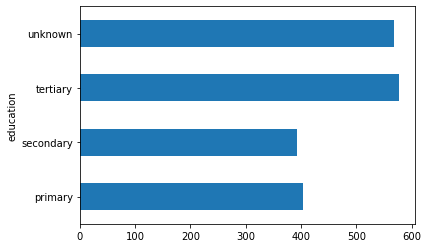

In [267]:
df.groupby(['education'])['balance'].median().plot.barh()

Thus, we can conclude from graph that customer with tertiary level of education has highest median value for balance.

### Q4.Make a box plot for pdays. Do you see any outliers?

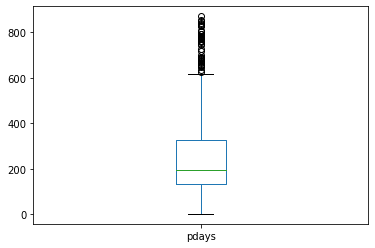

In [268]:
df1.pdays.plot.box()
plt.show()

Yes, from the above box plot we can see that there are outliers present in pdays.

The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”. So performing bi-variate analysis to identify the features that are directly associated with the target variable.

## BI- variate Analysis


### Q1 Converting the response variable to a convenient form

In [269]:
df1.response.value_counts(normalize=True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [270]:
df1.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [271]:
df1.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

### Q2.Make suitable plots for associations with numerical features and categorical features’

In [272]:
# here we are seperating object and numerical data types 
obj_col = []
num_col = []
for col in df1.columns:
    if df1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [273]:
print("Object data type features ",obj_col)
print("Numerical data type features ",num_col)

Object data type features  ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical data type features  ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


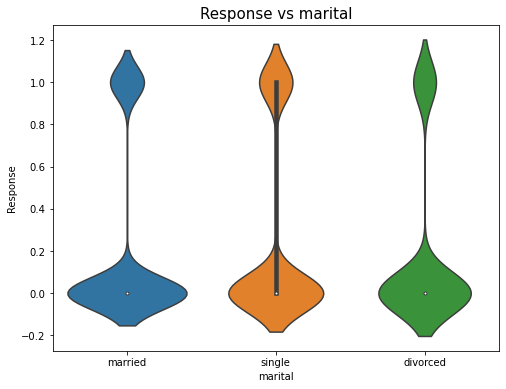

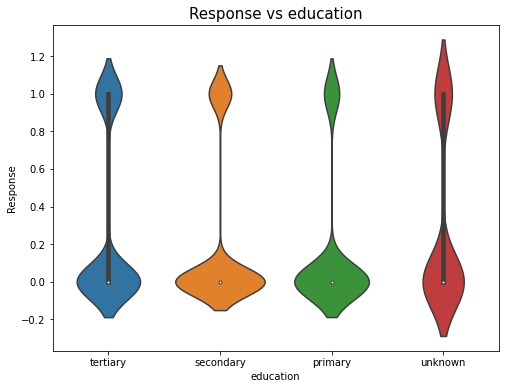

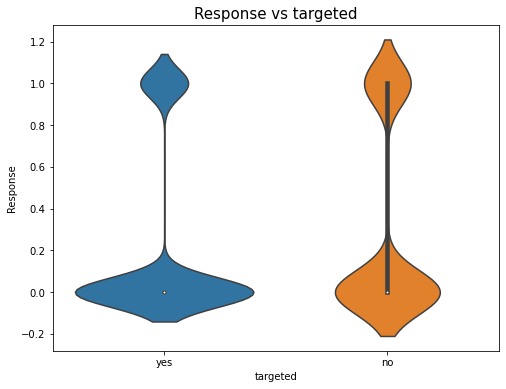

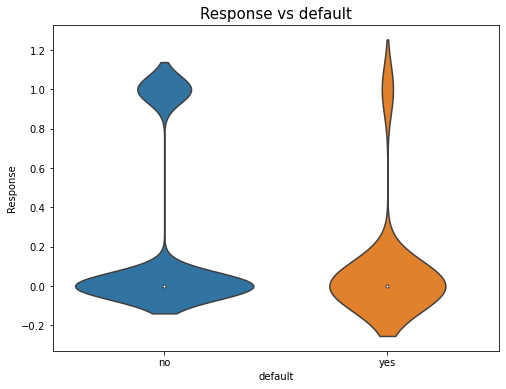

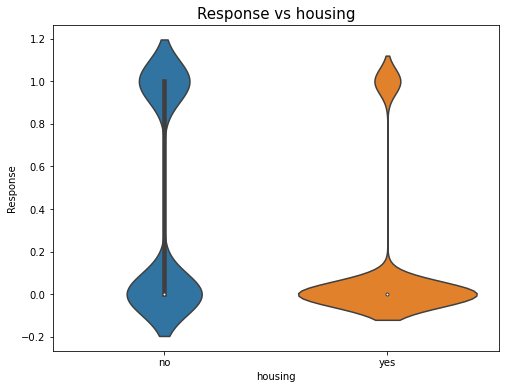

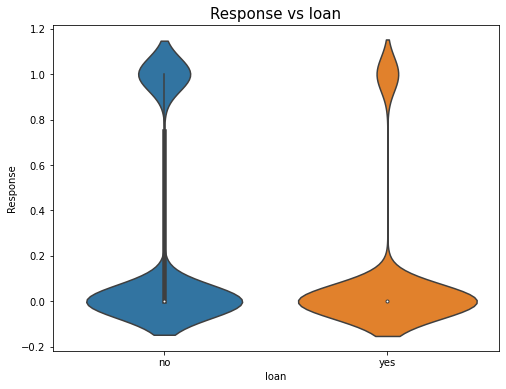

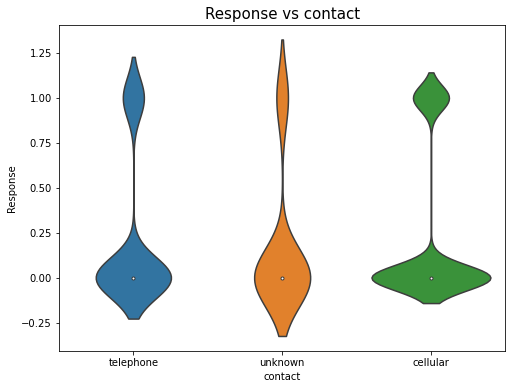

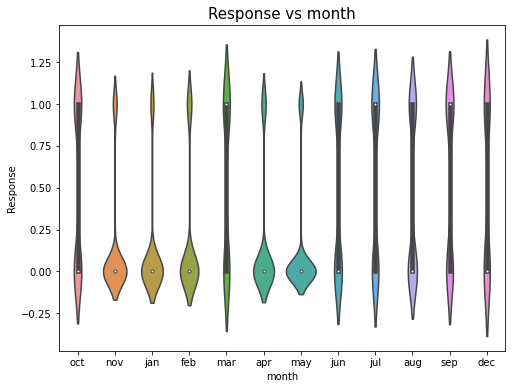

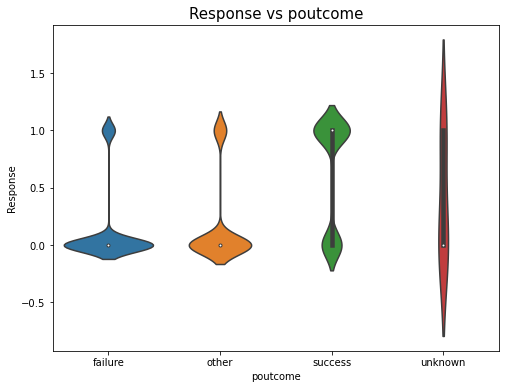

In [274]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.violinplot(df1[col],df1["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()
#sns.despine()
# violin plots give best of both worlds 
# it gives boxplot and distribution of data like whether the data is skewed or not.
# if normally distributed then it's the best you can get.
# you can also use barplots in this case.


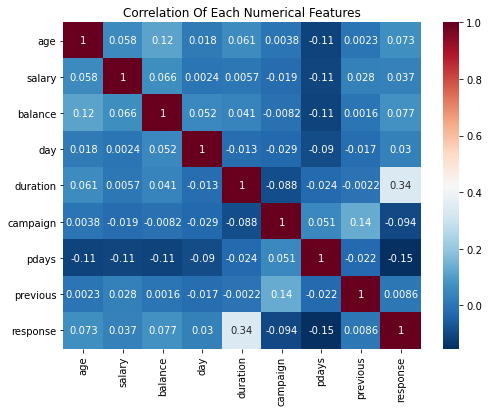

In [275]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

we can see that duration variable is highly correlated with response variable 'Response Flag' .Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

<Figure size 720x576 with 0 Axes>

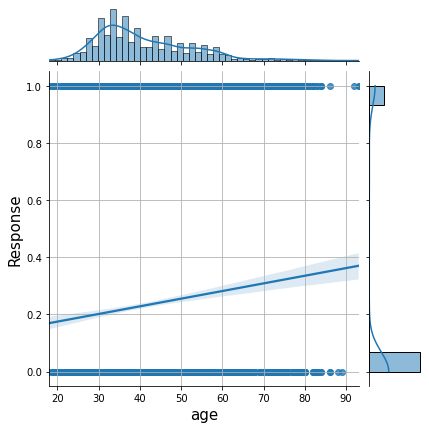

<Figure size 720x576 with 0 Axes>

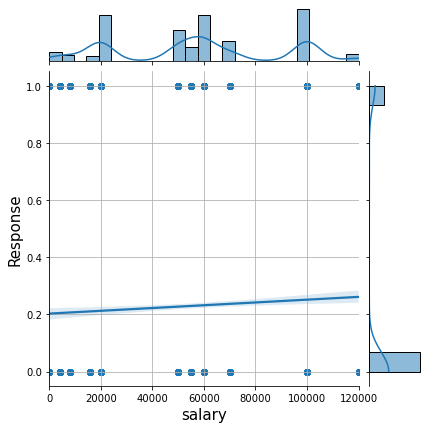

<Figure size 720x576 with 0 Axes>

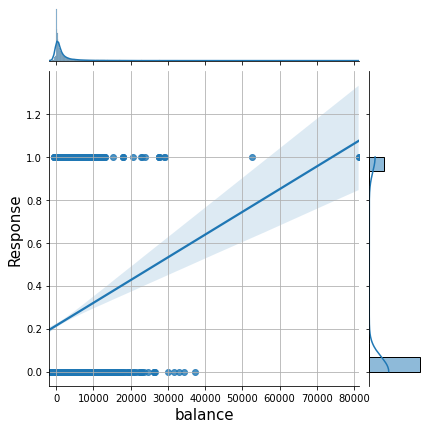

<Figure size 720x576 with 0 Axes>

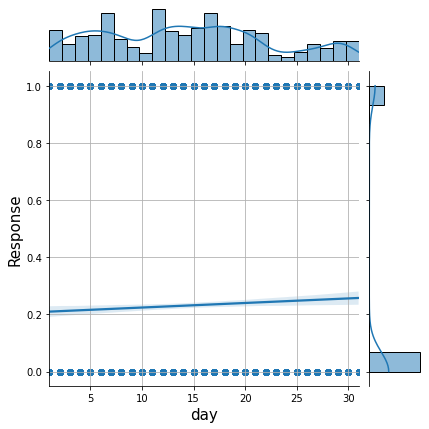

<Figure size 720x576 with 0 Axes>

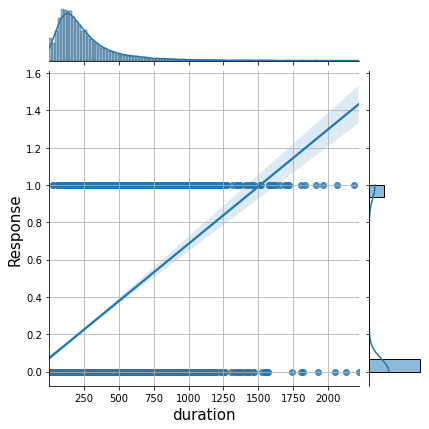

<Figure size 720x576 with 0 Axes>

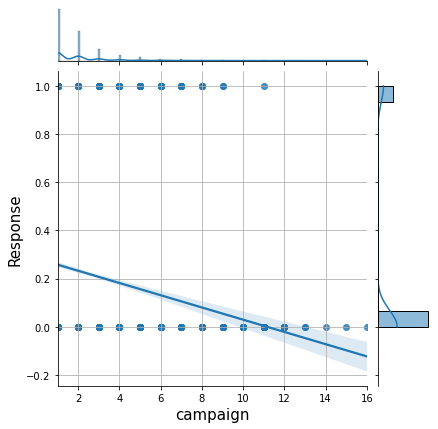

<Figure size 720x576 with 0 Axes>

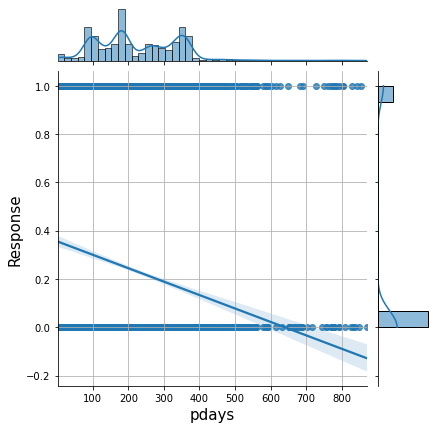

<Figure size 720x576 with 0 Axes>

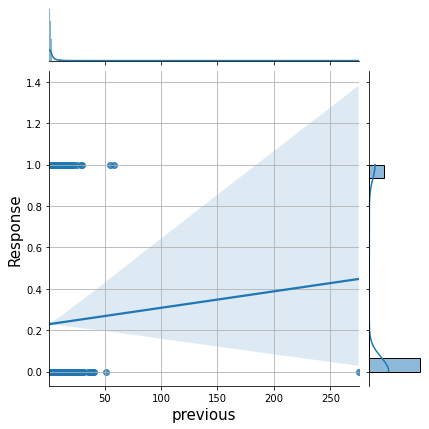

In [276]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df1[col],y = df1["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

### Label Encoding of Categorical Variables.

In [277]:
from sklearn.preprocessing import LabelEncoder

In [278]:
df2 = df1[obj_col].apply(LabelEncoder().fit_transform)

In [279]:
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [280]:
df3 = df2.join(df1[num_col])

In [281]:
df3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1


In [282]:
df3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


# Model Building

## Logistic Regression Model¶


### Q1.Make a predictive model using logistic regression


In [283]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
np.random.seed(42)

In [284]:
import warnings
warnings.filterwarnings("ignore")

In [285]:
X = df3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [286]:
y= df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [287]:
# 20% of data will be used for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)

In [288]:

lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

In [289]:
cv_score= cross_val_score(lm,X_train,y_train, cv=5)
np.mean(cv_score)

0.7813777441332324

In [290]:
y_pred = lm.predict(X_test)

In [291]:
y_train

,response
29457,0
25380,0
43694,1
30484,0
34595,0
...,...
29150,0
27711,0
37271,0
40895,0


###  Q2 Use RFE to select top n features in an automated fashion (choose n as you see fit)


In [292]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [293]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [294]:
df.select_dtypes(include=[np.number])

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0
45207,71,55000,1729,17,456,2,-1,0
45208,72,55000,5715,17,1127,5,184,3
45209,57,20000,668,17,508,4,-1,0


In [295]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

In [296]:
rfe = RFE (lm,10)
rfe = rfe.fit(X_train,y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan',
       'contact', 'poutcome', 'campaign'],
      dtype='object')

These are the columns obtained with RFE

In [297]:
# creating dataframe with RFE Selected variables
X_train_rfe = X_train[rfe_]
X_test_rfe = X_test[rfe_]


In [298]:
def build_model(X,y):
    X = sm.add_constant(X)
    
    #adding constant
    lm=sm.OLS(y,X).fit()
    print(lm.summary()) #summary
    return X

def checkVIF(X):
    vif=pd.DataFrame()
    vif['Features']=X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF' , ascending = False)
    return(vif)

In [299]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     198.1
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:30:34   Log-Likelihood:                -2811.8
No. Observations:                6605   AIC:                             5646.
Df Residuals:                    6594   BIC:                             5720.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2655      0.027      9.814      0.0

In [300]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,marital,4.04
2,education,3.77
3,targeted,3.60
0,job,2.78
5,housing,2.70
9,campaign,2.64
8,poutcome,1.66
6,loan,1.18
7,contact,1.09
4,default,1.01


In [301]:
X_train_new = X_train.drop('housing',axis=1)
checkVIF(X_train_new)

,Features,VIF
9,age,11.64
2,education,6.49
3,targeted,6.38
10,salary,5.37
15,pdays,4.62
1,marital,4.43
12,day,4.07
7,month,3.60
0,job,2.84
14,campaign,2.75


In [302]:
checkVIF(X_train_new)

,Features,VIF
9,age,11.64
2,education,6.49
3,targeted,6.38
10,salary,5.37
15,pdays,4.62
1,marital,4.43
12,day,4.07
7,month,3.60
0,job,2.84
14,campaign,2.75


In [303]:
feats=list(X_train_new.columns)
df.columns


Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [304]:
feats=list(X_train_new.columns)


In [305]:
# now for selected features we have to form a model and check accuracy
lm_sel = LogisticRegression()
lm_sel.fit(X_train_new[feats],y_train)

LogisticRegression()

### Q3 Estimate The model Performance using K fold Validation

In [306]:
auc = [X_train_new,X_train_new[feats]]
results_c = []
names_c = []
models = []
models.append(('LogisticRegression',LogisticRegression()))
for i in auc:
    kfold = KFold(n_splits=10,random_state=7)
    
    # train the model
    cv_results = cross_val_score(LogisticRegression(), i, y_train, cv=kfold, scoring='accuracy')
    results_c.append(cv_results)
    names_c.append(names_c)
    msg ="%s: %f (%f)" % (LogisticRegression,cv_results.mean(),cv_results.std())
    print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.779562 (0.020841)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.779562 (0.020841)


### By taking all features we have got an accuracy using k fold cross validation as % 0.77 and by taking a selected features we got 82%

### logistic regression achieved an accuracy of about 88%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

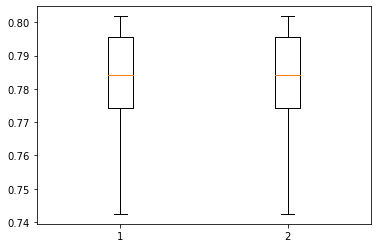

In [307]:
plt.boxplot(results_c)
plt.show()

### Test LR model on the test set

In [332]:
predictions = lm.predict(X_test)
pred_selected = lm_sel.predict(X_test[feats])

### Q4 What is the precision, recall, accuracy of your model

In [333]:
print('For all features')
print(accuracy_score(y_test,predictions))
print("For selected Fetures")
print(accuracy_score(y_test,pred_selected))

For all features
0.7808716707021792
For selected Fetures
0.7802663438256658


### Previously we have done prediction by using all features now we haveto only selected features

In [310]:
rfe = list (X_train_new)
selected = X_train

In [311]:
confusion_matrix(y_pred,y_test)

array([[1230,  310],
       [  52,   60]], dtype=int64)

In [312]:
f1_score(y_pred,y_test)

0.24896265560165978

In [313]:
#Classification Report
print('This is for all features')
print(classification_report(y_test, y_pred))

This is for all features
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1282
           1       0.54      0.16      0.25       370

    accuracy                           0.78      1652
   macro avg       0.67      0.56      0.56      1652
weighted avg       0.74      0.78      0.73      1652



### Q5 Which Features Are Most important from your Model

In [314]:
rfe = list(X_train_new)

print('These are the most important features for our model to make accurate prediction',rfe)

These are the most important features for our model to make accurate prediction ['job', 'marital', 'education', 'targeted', 'default', 'loan', 'contact', 'month', 'poutcome', 'age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Predictive model 2: Random Forest

### Q1 Make a predictive model using random forest technique
### Q2 Use not more than 50 trees, and control the depth of the trees to prevent overfitting
 

In [315]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [316]:

model =RandomForestClassifier(n_estimators=45)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=45)

In [317]:
y_pred =model.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
index = ['Actual No','Actual Yes']
columns = ['Predicted Yes','Predicted No']
demo = pd.DataFrame(conf_mat,index=index,columns=columns)
demo

,Predicted Yes,Predicted No
Actual No,1188,94
Actual Yes,156,214


In [318]:
from sklearn.metrics import *

In [319]:
print('Recall score',round(recall_score(y_test,y_pred),2))
print('precision score',round(precision_score(y_test,y_pred),2))


Recall score 0.58
precision score 0.69


### Q3.Estimate the model performance using k fold cross validation


In [320]:
a =[X_train,X_train[feats]]

In [321]:
for i in a:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(LogisticRegression(), i, y_train, cv=kfold, scoring='accuracy')
    print('Cross validation Score:',cv_results.mean())

Cross validation Score: 0.779559437032962
Cross validation Score: 0.7795617292440287


Cross validation Score(For all Features): 0.779559437032962

 Cross validation Score (For selected Features):7795617292440287

In [322]:
confusion_matrix(y_pred,y_test)

array([[1188,  156],
       [  94,  214]], dtype=int64)

In [336]:
model_s = RandomForestClassifier(n_estimators=45)
model_s.fit(X_train[feats],y_train)

RandomForestClassifier(n_estimators=45)

In [339]:

#y_pred_ = model.predict(X_test[feats])


In [338]:
print('For all features')
print(accuracy_score(y_test,y_pred))
print("For selected Fetures")
print(accuracy_score(y_test,y_pred))

For all features
0.8486682808716707
For selected Fetures
0.8486682808716707


### Q4 What is the precision, recall, accuracy of your model?


In [325]:
#Classification Report
print('This is for all features')
print(classification_report(y_test, y_pred))

This is for all features
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1282
           1       0.69      0.58      0.63       370

    accuracy                           0.85      1652
   macro avg       0.79      0.75      0.77      1652
weighted avg       0.84      0.85      0.84      1652



In [326]:
print ('precision score for selected features',precision_score(y_test,y_pred))

precision score for selected features 0.6948051948051948


### Compare the performance of the Random Forest and the logistic model –


Accuracy score for selected features when we use logistic model is-
 #### 0.78
and when we use random forest model is 
#### 0.85

precision score for selected features when we use logistic model is
#### 0.54
and when we use random forest model is 
#### 0.69

cross val  score for selected features when we use logistic model is
#### 0.77956
and when we use random forest model is 
#### 0.77955


### Which metric did you choose and why?
The next step after implementing a machine learning algorithm is to find out how effective is the model based on metric and datasets.Different performance metrics are used to evaluate differant machine learning algorithm.For example classifier used to distinguish images of differant objects,we can use classification performance metrics such as,precision score,accuracy score,recall score and cross val score etc.